In [15]:
import tabix
import pandas as pd

In [16]:
def parseInfo(info):
    infodict = dict([kv.split('=') for kv in info.split(';') if '=' in kv and not kv.endswith('=.')])
    return {k: float(v) for k,v in infodict.items() if 'AF_' in k}
def alleleFreq(gte):
    ref,alt = 0,0
    for rec in gte:
        gt = rec.split(':')[0]
        ref += gt.count('0')
        alt += gt.count('1')
    return int(100*alt/(ref+alt))
        
    

In [15]:



dbsnpFiles = '/home/ahenschel/YemenGenomeAnalysis_Unused/WGS/DBSNP153/common_all_20180418_%s.pos'
yemenFiles = '/home/ahenschel/YemenGenomeAnalysis_Unused/WGS/yemeni_annotated_fixed_%s.pos'

posstats = []
afhisto_total = []
for chrom in range(22,23):
    dbsnp = dbsnpFiles % chrom
    yemen = yemenFiles % chrom
    dbsnpPos = set([line.strip() for line in open(dbsnp)])
    yemenPos = set([line.strip() for line in open(yemen)])
    diff = set(yemenPos).difference(set(dbsnpPos))
    afhisto =[0]*101
    for pos in map(int,diff):
        hit=list(tb.query(f'chr{chrom}', pos-1, pos))[0]    
        af=alleleFreq(hit[9:])
        afhisto[af] += 1
    afhisto_total.append(afhisto)                  
    posstats.append((chrom, len(yemenPos), len(dbsnpPos), len(diff)))
pd.DataFrame(afhisto_total).T.to_csv('afhisto.csv')             
pd.DataFrame(posstats).to_csv('posStats.csv')
    

,0,1,2,3
0,22,321572,478979,151761


In [21]:
!ps -ef|grep python

root        1336       1  0 Dec21 ?        00:00:00 /usr/bin/python3 /usr/bin/networkd-dispatcher --run-startup-triggers
root        1468       1  0 Dec21 ?        00:00:00 /usr/bin/python3 /usr/share/unattended-upgrades/unattended-upgrade-shutdown --wait-for-signal
ahensch+    6502       1  0 Dec21 ?        00:01:56 /home/ahenschel/miniconda3/envs/admix/bin/python /home/ahenschel/miniconda3/envs/admix/bin/jupyter-notebook --ip=0.0.0.0
ahensch+    7862       1  0 Dec21 ?        00:01:42 /home/ahenschel/miniconda3/envs/rgi/bin/python /home/ahenschel/miniconda3/envs/rgi/bin/jupyter-notebook --ip=0.0.0.0 --no-browser
ahensch+    7874    7862  0 Dec21 ?        00:01:42 /home/ahenschel/miniconda3/envs/rgi/bin/python -m ipykernel_launcher -f /home/ahenschel/.local/share/jupyter/runtime/kernel-3e0a334a-5c22-4bd6-a3a8-4bdec44b4a5c.json
ahensch+   22464    3310  0 Dec23 ?        00:00:07 /usr/bin/python3 /usr/bin/update-manager --no-update --no-focus-on-map
ahensch+   30852    6502  0 Dec24 ?  

In [17]:
import numpy as np

afs = pd.read_csv('/home/ahenschel/YemenGenomeAnalysis_Unused/WGS/afhisto.csv')
afs.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,285612,259246,210746,198057,188477,177981,178328,157507,146282,...,109777,95264,91601,105959,101638,84878,81852,76690,49863,52590
2,2,89235,71628,58435,54496,52127,47385,50253,40189,41571,...,35896,27237,26266,28582,30000,24570,24901,23876,15692,17903
3,3,45728,34347,28765,25869,25780,22764,24561,20303,21877,...,18545,12793,13052,13922,14954,11731,11693,12990,8602,9947
4,4,29225,21676,17967,15963,15831,14376,15389,11782,13825,...,11855,8002,8324,8704,9436,7441,7282,8935,5917,6608


In [ ]:
afs.columns =['AF']+list(range(1,23))
afs=afs.set_index('AF')

In [31]:
afs.index.name = 'Allele Frequency'

Text(0, 0.5, 'Count')

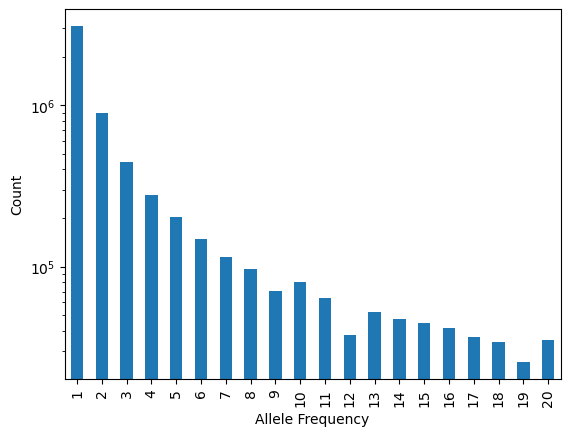

In [33]:
ax = afs.sum(axis=1)[1:21].plot(kind='bar', logy=True)
ax.set_ylabel('Count')

In [34]:
ax.get_figure().savefig('alleleFreqs_WGS.pdf')

In [28]:
afs.sum(axis=1)[5:].sum()
#.plot(kind='bar')

1936819

In [14]:
tb = tabix.open(url)

3

In [5]:
url = '/home/ahenschel/YemenGenomeAnalysis_Unused/WGS/yemeni_annotated_fixed.vcf.bgz'
tb = tabix.open(url)

In [7]:
for pos in sorted(map(int,diff)
hit=list(tb.query('chr22', 49443748, 49443749))[0]
alleleFreq(hit[9:])


0.011111111111111112

In [32]:
hit[9:]

['0/0:22,0:22:36:.:.:0,36,540',
 '0/0:39,0:39:57:.:.:0,57,855',
 '0/0:37,0:37:0:.:.:0,0,241',
 '0/0:45,0:45:84:.:.:0,84,1260',
 '0/0:27,0:27:60:.:.:0,60,900',
 '0/0:25,0:25:57:.:.:0,57,855',
 '0/0:22,0:22:0:.:.:0,0,76',
 '0/0:37,0:37:69:.:.:0,69,1035',
 '0/0:29,0:29:54:.:.:0,54,810',
 '0/0:35,0:35:40:.:.:0,40,864',
 '0/0:28,0:28:66:.:.:0,66,990',
 '0/0:31,0:31:49:.:.:0,49,730',
 '0/0:13,0:13:24:.:.:0,24,360',
 '0/0:17,0:17:45:.:.:0,45,675',
 '0/0:15,0:15:29:.:.:0,29,417',
 '0/0:25,0:25:0:.:.:0,0,146',
 '0/0:19,0:19:30:.:.:0,30,503',
 '0/0:30,0:30:66:.:.:0,66,990',
 '0/0:18,0:18:36:.:.:0,36,540',
 '0/0:43,0:43:69:.:.:0,69,1035',
 '0/0:28,0:28:0:.:.:0,0,187',
 '0/0:33,0:33:40:.:.:0,40,784',
 '0/0:26,0:26:71:.:.:0,71,758',
 '0/0:35,0:35:75:.:.:0,75,1125',
 '0/0:41,0:41:66:.:.:0,66,990',
 '0/0:32,0:32:47:.:.:0,47,755',
 '0/0:24,0:24:63:.:.:0,63,945',
 '0/0:7,0:7:21:1|0:49443733_A_C:0,21,347',
 '0/0:36,0:36:84:.:.:0,84,1260',
 '0/0:32,0:32:38:.:.:0,38,795',
 '0/0:36,0:36:45:.:.:0,45,675',
 

In [8]:

def query(chrom, pos):
    pos = int(pos)
    hit = list(tb.query(chrom, pos-1, pos))[0]
    return [hit[1], pos, alleleFreq(hit[9:])]

    #d = parseInfo(rec[7])
    #d['pos'] = rec[1]
    
q = query(f'chr{chrom}', 49443749)
#df = pd.DataFrame([query(f'chr{chrom}', pos) for pos in sorted(map(int,diff))[:10000]])
#df[df[0]!=df[1]]
               
               
               
    


In [9]:
q

['49443749', 49443749, 0.011111111111111112]

In [9]:
df[0] = df[0].astype(int)
df[df[0]!=df[1]]

,0,1
27,10516227,10516235
162,10530516,10530521
166,10530681,10530683
195,10531673,10531686
295,10541049,10541050
...,...,...
9854,11037485,11037557
9855,11037485,11037635
9856,11037485,11037644
9857,11037485,11037660


In [43]:
recs = tb.query("chr6", 73926, 73928)
for rec in recs:
    print(rec[:3])

['chr6', '73924', 'rs201634483']
['chr6', '73927', '.']
['chr6', '73928', 'rs148062531']


In [33]:
'54458147' in diff

True

In [14]:
list(diff)[:10]

['54458147',
 '111635527',
 '75702340',
 '145603729',
 '28760964',
 '7490047',
 '113579912',
 '10455079',
 '149988968',
 '88971781']